# Zuber
This report will further understand the impact of external factors on rides and analyse data from Zuber's competitors.

### Table of contents:

 - [General Information](#Info)
 
         General Information about the dataset
      
 - [Exploratory Data analysis](#Ana)
 
         Use of data analysis methods to examine the data
     
 - [Hypothesis Testing](#Hyp)
 
         Test the statistical significance of the data
     
 - [Final Conclusion](#Con)
 
         Final conclusion that will assess the impact of external factors and Zuber's competitors

## General Information <a class="anchor" id="Info"></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
taxi= pd.read_csv("/datasets/project_sql_result_01.csv")
rides = pd.read_csv("/datasets/project_sql_result_04.csv")
display(taxi,rides)
display(taxi.describe(), rides.describe())
display(taxi.info(), rides.info())
dupst =  taxi[taxi.duplicated()]
dupsr = rides[rides.duplicated()]
print(dupst) 
print(dupsr)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

None

Empty DataFrame
Columns: [company_name, trips_amount]
Index: []
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


### Conclusion
Using pandas to read the csv, I seperated the two csv files into rides and taxi. Taxi contains the name of taxi companies that are competitors to Zubar and the amount of trips they do in the time period of the 15-16th of November. Rides contains information about the name of drop off locations and the average trips that each drop off location has. When checking the data type, they are correct to the theme of the column ie trips_amount should be an interger while average_trips (being an average) should be a float. The duplicate.() method was also used to check that there are no duplicate rows in the datasets.

## Exploratory data analysis <a class="anchor" id="Ana"></a>

Top ten average_trips by drop off_location_name:

   dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


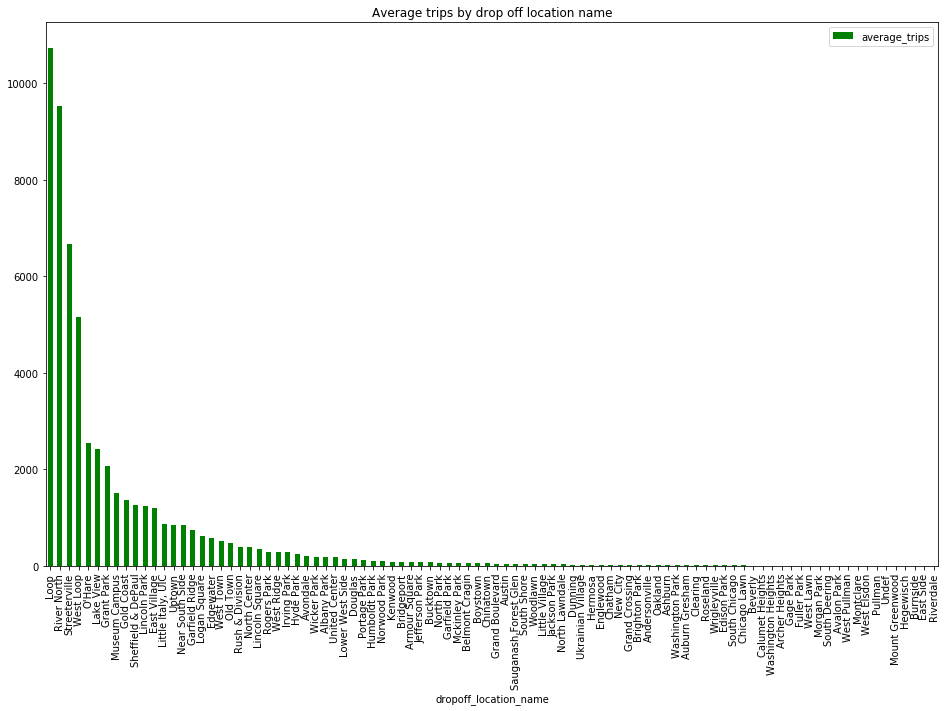

In [2]:
top= rides.sort_values(by='average_trips', ascending=False).head(10)
print('Top ten average_trips by drop off_location_name:\n\n',top)
rides.plot(x='dropoff_location_name',y='average_trips',kind='bar',color='green', figsize=(16, 10), 
           title='Average trips by drop off location name');
plt.show()

Top ten trips_amount by taxi company:

                         company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


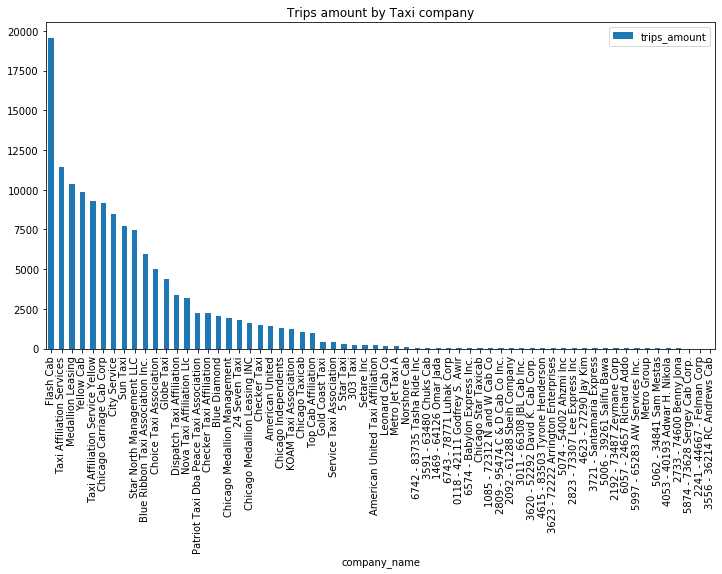

In [3]:
topt = taxi.sort_values(by='trips_amount', ascending=False).head(10)
print('Top ten trips_amount by taxi company:\n\n',topt)
taxi.plot(x='company_name',y= 'trips_amount',kind='bar', figsize=(12, 6), title='Trips amount by Taxi company');

### Conclusion

The first graph is a bar chart which shows the average trips with the drop off location name. Here the top locations are identified were they have the highest amount of average ( as shown in the sorted average trips amount) but trip locations past West Town have the lowest amount of average trips.

The second graph is a bar chart which shows the trips amount to Taxi company. Taxi companies past Tob Cab Affiliation have the lowest amount of trips and thus, are not important competitors to Zuber. The top companies (as shown in the sorted trips amount) are the biggest competitors, having the highest trips amount. 

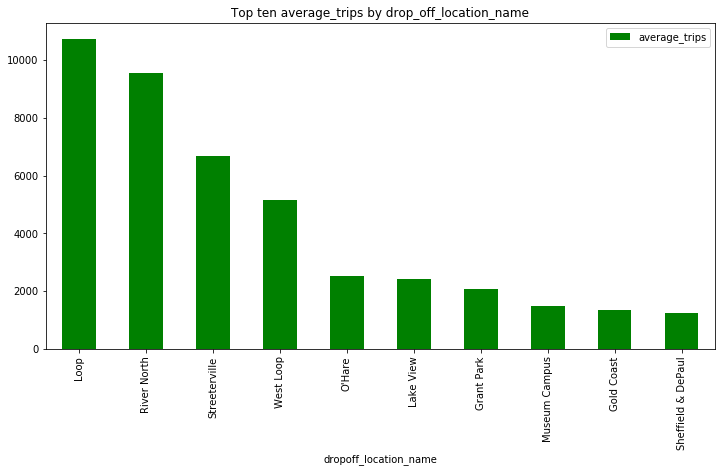

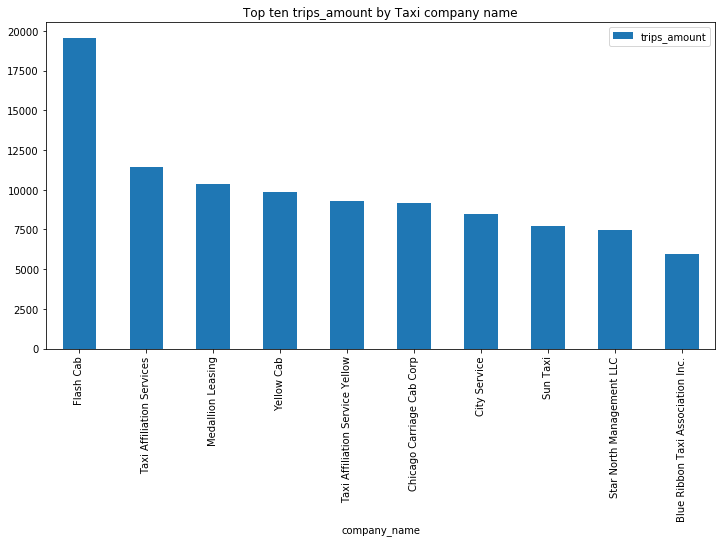

In [4]:
top.plot(x='dropoff_location_name',y='average_trips',kind='bar',color='green', figsize=(12, 6),
        title='Top ten average_trips by drop_off_location_name');
topt.plot(x='company_name',y= 'trips_amount',kind='bar', figsize=(12, 6),
         title='Top ten trips_amount by Taxi company name');


### Conclusion
Focusing on the top ten trips_amount and average_trips in each respective dataset, Flash Cab Taxi and Drop off location Loop have the highest amount of trips. It could be that as Loop is a popular drop off location, Flash Cab could be the company that  does alot trips around that area. However, this is dependent on the location of the taxi company and the areas they cover.

<div class="alert alert-success">
    Great, top taxi companies and dropoff locations were identified successfully!
</div>

## Hypothesis testing <a class="anchor" id="Hyp"></a>

In [4]:
weather = pd.read_csv("/datasets/project_sql_result_07.csv")
display(weather)
rains= weather[weather['weather_conditions']=='Bad']
rains_d= rains['duration_seconds']
not_rain = weather[weather['weather_conditions']=='Good']
not_rain_d= not_rain['duration_seconds']

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [5]:
print("Null hypothesis: \nThe average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.\n")
print("Alternative hypothesis: \nThe average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
alpha= 0.05
results = st.ttest_ind(rains_d, not_rain_d)
print('\np-value : {}'.format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")
    print('\nThe average duration on rainy days:\n','{:.2f}'.format(rains_d.mean()),'\n','\nAverage duration of rides on non-rainy days:\n','{:.2f}'.format(not_rain_d.mean()))
    print('\n')
else:
        print("We can't reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")


Null hypothesis: 
The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

Alternative hypothesis: 
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

p-value : 6.517970327099473e-12
We reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

The average duration on rainy days:
 2427.21 
 
Average duration of rides on non-rainy days:
 1999.68




### Conclusion
In the hypothesis test, the null hypothesis that average during of rides does not change on rainy saturdays was rejected. Using the industry standard alpha of 0.05, the p-value of the test meant that the null was rejected in favour of the alternative hypothesis that the average during of rides from Loop to O'Hare airport does change on rainy saturdays. This is affirmed by looking at the mean during of rides for each period where the average during on rainy days was 2427.21 seconds while non-rainy days was 1999.68 seconds.  So, it can be concluded that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Final Conclusion <a class="anchor" id="Con"></a>

 To conclude the popular drop off locations in the area are places like Loop and River North while Zuber's main competitors are companies like Flash Cab and Taxi Affiliation Services. Further information like pick_up location is needed to determine what Zuber's areas should be, inline with their main competitors. Also, the hypothesis test shows that external factors do influence rides. When the weather conditions are bad (rainy or stormy) the average duration of rides do increase, while it decreases during good weather.